# Reto 02
En este reto deberás de: 

    1) Agrandar la cantidad de características de entrada de 10 a 15.

    2) Agregar una capa neuronal (para que sean 3)

    3) Agrandar la primera y segunda capa neuronal.

Deberás de entrenar tu red neuronal y obtener resultados con ello. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

Aquí agregamos las características nuevas en n_features = 15

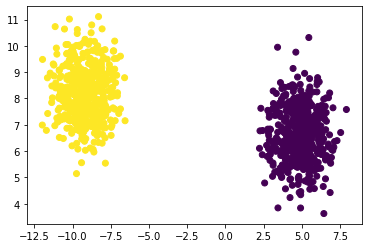

X train shape:(NumFeatures, NumMuestras)
(15, 600)
Y_train shape:(1, NumMuestras)
(1, 600)


In [2]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=15)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.reshape(y_train.shape[0],1).T
y_test = y_test.reshape(y_test.shape[0],1).T

print("X train shape:(NumFeatures, NumMuestras)")
print(x_train.shape)
print("Y_train shape:(1, NumMuestras)")
print(y_train.shape)


In [3]:
def inicializarCapa(numCaracteristicas, numNeuronas):
    w = np.random.rand(numNeuronas,numCaracteristicas)    
    b = np.random.rand(numNeuronas,1)
    return w,b

def calcularZ(w,x,b):
    z = np.dot(w,x) + b     
    return z

def activacion(z):
    y = 1 / (1 + np.exp(-z))
    return y

def capaNeuronal(w,x,b):
    z = calcularZ(w,x,b)
    y_pred = activacion(z)
    return z, y_pred

def calcularError(y_esperado, y_obtenido):
    numMuestras = y_esperado.shape[0]
    error = - (y_esperado *np.log(y_obtenido) + (1 - y_esperado)*np.log(1 - y_obtenido))
    error = np.sum(error) / numMuestras
    return error

def calcular_derivadas_capaFinal(y_esperado, y_obtenido, entradaCapaActual,numMuestras):
    dz = y_obtenido - y_esperado    
    dw = (1 / numMuestras) * np.dot(dz,entradaCapaActual.T)
    db = (1 / numMuestras) * np.sum(dz, axis=1, keepdims=True)
    return dz, dw, db

def calcular_derivadas_capasIntermedias(dz_capaSiguiente, w_capaSiguiente, salidaCapaActual, entradaCapaActual, numMuestras):
    dz = np.multiply(np.dot(w_capaSiguiente.T, dz_capaSiguiente), 1 - np.power(salidaCapaActual, 2))
    dw = (1 / numMuestras) * np.dot(dz,entradaCapaActual.T)
    db = (1 / numMuestras) * np.sum(dz, axis=1, keepdims=True)
    return dz, dw, db

Aqui declaramos las capas neuronales que vamos a necesitar. 

In [4]:
#Capa 1
w1,b1 = inicializarCapa(numCaracteristicas = 15,numNeuronas = 10)
#Capa 2
w2,b2 = inicializarCapa(numCaracteristicas = 10,numNeuronas = 4)
#Capa 3
w3,b3 = inicializarCapa(numCaracteristicas = 4,numNeuronas = 2)

### Entrenamiento.
Recuerda como debe de conectarse tanto la propagación hacia adelante, como la propagación hacia atrás. 

In [5]:
lr = 0.01
minError = 5
maxEpochs = 100000
m = x_train.shape[1]
for counter in range(0,maxEpochs):
    #Calculamos la capa 1
    z1, a1 = capaNeuronal(w1,x_train,b1)
    #Calculamos la capa 2 con las salidas de la 1
    z2, a2 = capaNeuronal(w2,a1,b2)
    #Calculamos la capa 2 con las salidas de la 1
    z3, y_obtenido = capaNeuronal(w3,a2,b3)
    
    error = calcularError(y_train, y_obtenido)
    dz3, dw3, db3 = calcular_derivadas_capaFinal(y_esperado= y_train, 
                                                 y_obtenido = y_obtenido,
                                                 entradaCapaActual=a2,
                                                 numMuestras = m)
    
    dz2, dw2, db2 =calcular_derivadas_capasIntermedias(dz_capaSiguiente=dz3,
                                                       w_capaSiguiente=w3,
                                                       salidaCapaActual=a2,
                                                       entradaCapaActual=a1, 
                                                       numMuestras = m)
    
    dz1, dw1, db1 =calcular_derivadas_capasIntermedias(dz_capaSiguiente=dz2,
                                                       w_capaSiguiente=w2,
                                                       salidaCapaActual=a1,
                                                       entradaCapaActual=x_train, 
                                                       numMuestras = m)
    
    w1 = w1 - lr * dw1
    b1 = b1 - lr * db1
    w2 = w2 - lr * dw2
    b2 = b2 - lr * db2
    w3 = w3 - lr * dw3
    b3 = b3 - lr * db3
    
    if(error < minError):
        print("Final epoch:"+str(counter))
        break;
    
    if counter % 1000 == 0:
        print("Epoch:"+str(counter))
        print("Error: "+str(error))
        
print("final error: "+str(error))

Epoch:0
Error: 1360.2051452534279


/home/nightcrow/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


Epoch:1000
Error: 630.580266812023
Epoch:2000
Error: 345.3978872453653
Epoch:3000
Error: 238.7184952716558
Epoch:4000
Error: 179.66603449976404
Epoch:5000
Error: 138.2183034988725
Epoch:6000
Error: 90.61112873844641
Epoch:7000
Error: 61.734629950681104
Epoch:8000
Error: 50.04556236222594
Epoch:9000
Error: 42.73143536732694
Epoch:10000
Error: 37.532877259365755
Epoch:11000
Error: 33.54283179987775
Epoch:12000
Error: 30.326384987539498
Epoch:13000
Error: 27.654181259022927
Epoch:14000
Error: 25.39209659226588
Epoch:15000
Error: 23.452623929801142
Epoch:16000
Error: 21.773412563270206
Epoch:17000
Error: 20.30746301292927
Epoch:18000
Error: 19.018195159921035
Epoch:19000
Error: 17.876610814116304
Epoch:20000
Error: 16.859447517073413
Epoch:21000
Error: 15.947873586443212
Epoch:22000
Error: 15.126522348355254
Epoch:23000
Error: 14.382760259575845
Epoch:24000
Error: 13.706125091472627
Epoch:25000
Error: 13.087891048423305
Epoch:26000
Error: 12.520729861239012
Epoch:27000
Error: 11.9984449749

## Pruebas de la red neuronal.

In [7]:
#Probando:
z1, a1 = capaNeuronal(w1,x_train,b1)
z2, a2 = capaNeuronal(w2,a1,b2)
z3, y_obtenido_test = capaNeuronal(w3,a2,b3)

print("Entradas "+str(x_test))
print("Genera salidas (redondeadas)..."+str(np.round(y_obtenido_test)))

Entradas [[-10.22503731   4.93292063   4.74561252 ...   5.41703297  -7.84555833
    5.38222144]
 [  8.70715899   7.79424899   5.42010278 ...   8.07854467   7.36749019
    4.82582853]
 [  0.55981253  -5.08867211  -5.63121104 ...  -3.97437741  -0.22247052
   -5.0778965 ]
 ...
 [ -1.8737209   -5.30464528  -5.80559185 ...  -5.89442554  -1.1634949
   -5.05648748]
 [ -1.81595445   1.40991638  -0.39290519 ...  -2.07490583  -1.56945217
   -0.96068536]
 [  7.96224904   3.24906326   3.4572611  ...   2.02141426   7.0579083
    1.9885949 ]]
Genera salidas (redondeadas)...[[1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]]


/home/nightcrow/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
